References:
- Applied Machine Learning in Python (Coursera, University of Michigan)

For Theory:
- Machine Learning (Coursera, Stanford)

Datasets used:
- Breast Cancer Wisconsin (Diagnostic) dataset (from sklearn.datasets)
- IRIS (from sklearn.datasets)

# SVM with linear kernel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='|S23')

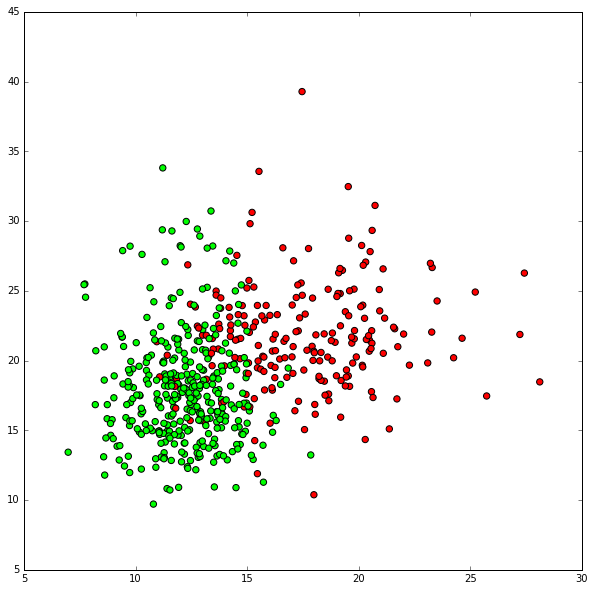

In [3]:
X = cancer['data']
y = cancer['target']

#load and visualize data - work with only two variables for now - easy to visualize
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, s=40)

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
Xred = X[:,0:2]
X_train, X_test, y_train, y_test = train_test_split(Xred,y)
lsvm = SVC(kernel = 'linear', C = 100).fit(X_train, y_train)
print lsvm.score(X_train,y_train)
print lsvm.score(X_test,y_test)

0.880281690141
0.916083916084


(9.3800000000000008, 40.259999999999344)

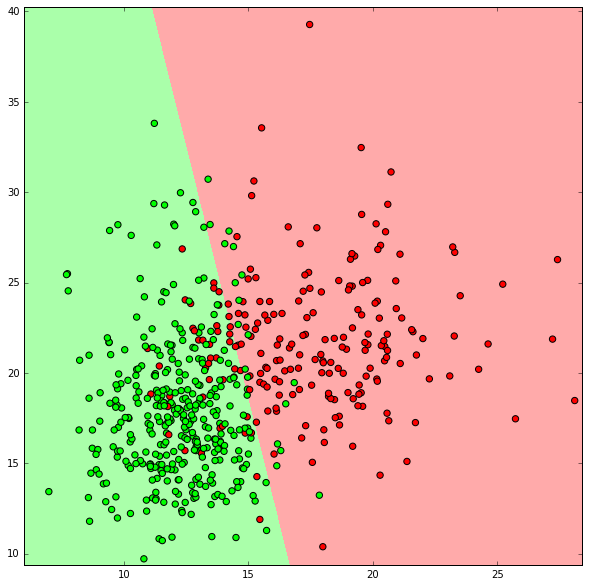

In [5]:
#plot decision boundaries

#x and y axis min and max
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

#select mesh step-size
h = 0.02
#prepare mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#concatenate along second axis to generate ndarray with point pairs
points = np.c_[xx.ravel(), yy.ravel()]

#predict for each point in the meshgrid
Z = lsvm.predict(points)
Z = Z.reshape(xx.shape)

#plot
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(Xred[:, 0], Xred[:, 1], c=y, cmap=cmap_bold, s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [6]:
#Using all features
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X,y)
lsvmf = SVC(kernel = 'linear', C = 100).fit(Xf_train, yf_train)
print lsvmf.score(Xf_train,yf_train)
print lsvmf.score(Xf_test,yf_test)

0.962441314554
0.944055944056


# Multi-class Classification
One v/s all technique - analyze coefficients to figure out classification boundaries

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
Xir = iris['data'][:,0:2] #using only two features, for visualization purposes
yir = iris['target']
Xir_train, Xir_test, yir_train, yir_test = train_test_split(Xir,yir)
lsvmir = SVC(kernel = 'linear', C = 100).fit(Xir_train, yir_train)
print lsvmir.score(Xir_train,yir_train)
print lsvmir.score(Xir_test,yir_test)

0.839285714286
0.710526315789


(1.0, 5.3800000000000043)

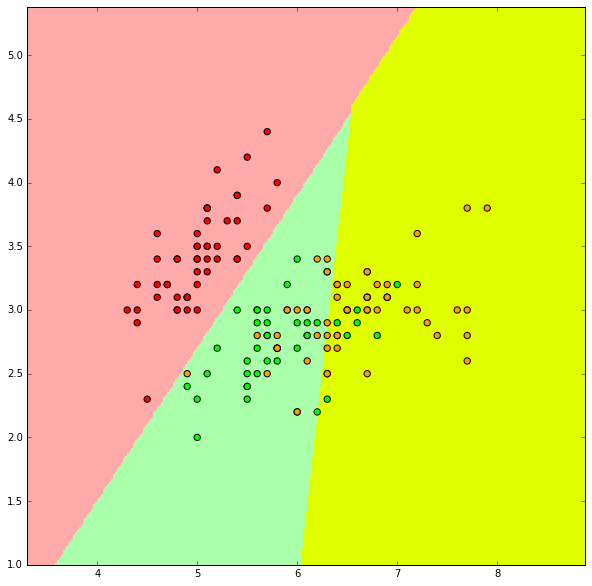

In [8]:
#plot decision boundaries

#x and y axis min and max
x_min, x_max = Xir_train[:, 0].min() - 1, Xir_train[:, 0].max() + 1
y_min, y_max = Xir_train[:, 1].min() - 1, Xir_train[:, 1].max() + 1

#select mesh step-size
h = 0.02
#prepare mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#concatenate along second axis to generate ndarray with point pairs
points = np.c_[xx.ravel(), yy.ravel()]

#predict for each point in the meshgrid
Z = lsvmir.predict(points)
Z = Z.reshape(xx.shape)

#plot
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#DFFF00'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FF9F00'])

plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(Xir[:, 0], Xir[:, 1], c=yir, cmap=cmap_bold, s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier
#on the (complete feature) iris dataset
Xi_train, Xi_test, yi_train, yi_test = train_test_split(iris.data, iris.target)
dt = DecisionTreeClassifier(max_depth = 3).fit(Xi_train, yi_train)
print dt.score(Xi_train, yi_train)
print dt.score(Xi_test, yi_test)

0.982142857143
0.973684210526


In [10]:
with open("iris_tree.dot", "w") as f:
    f = sklearn.tree.export_graphviz(dt,out_file = f,label='none',class_names=iris.target_names)
#run, in shell: dot -Tpng iris_tree.dot > iris_tree.png

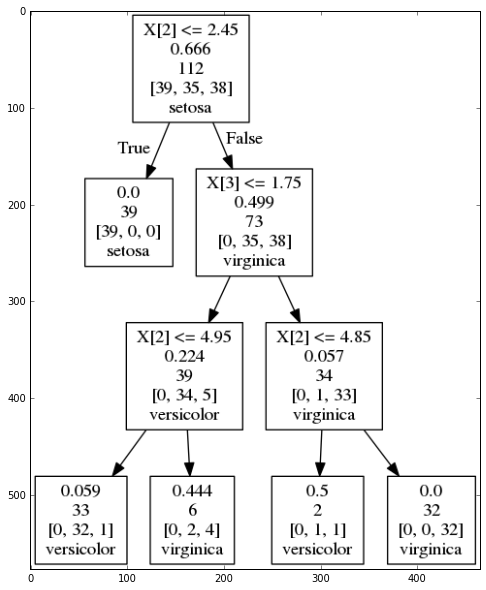

In [11]:
import matplotlib.image as mpimg
img=mpimg.imread('iris_tree.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.show()

# Gaussian Naive Bayes Classifier
(Theory: Wikipedia contributors. "Naive Bayes classifier." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 24 Sep. 2017. Web.)

In [20]:
from sklearn.naive_bayes import GaussianNB
Xc = cancer['data']
yc = cancer['target']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc)
gauss = GaussianNB().fit(Xc_train, yc_train)
gauss.score(Xc_test,yc_test)

0.95804195804195802

In [22]:
#On 2-D data
from sklearn.naive_bayes import GaussianNB
Xc = cancer['data'][:,0:2]
yc = cancer['target']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc)
gauss = GaussianNB().fit(Xc_train, yc_train)
gauss.score(Xc_test,yc_test)

0.84615384615384615

(8.7100000000000009, 40.269999999999328)

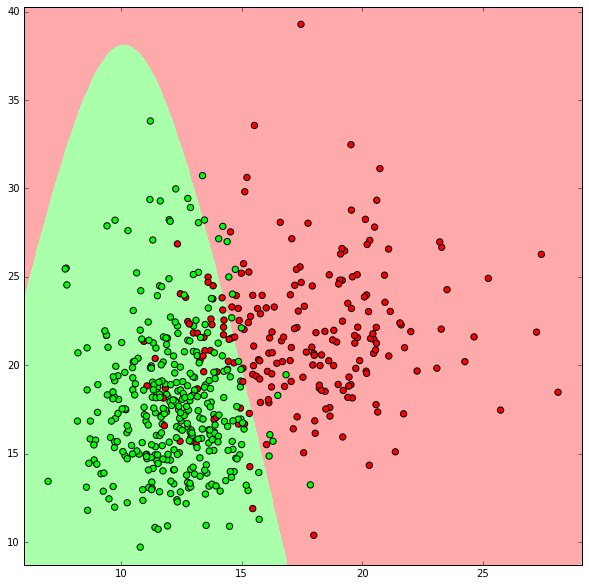

In [24]:
#plot decision boundaries

#x and y axis min and max
x_min, x_max = Xc_train[:, 0].min() - 1, Xc_train[:, 0].max() + 1
y_min, y_max = Xc_train[:, 1].min() - 1, Xc_train[:, 1].max() + 1

#select mesh step-size
h = 0.02
#prepare mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#concatenate along second axis to generate ndarray with point pairs
points = np.c_[xx.ravel(), yy.ravel()]

#predict for each point in the meshgrid
Z = gauss.predict(points)
Z = Z.reshape(xx.shape)

#plot
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(Xc[:, 0], Xc[:, 1], c=y, cmap=cmap_bold, s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Random forest classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
Xir = iris['data'][:,0:2] #using only two features, for visualization purposes
yir = iris['target']
Xir_train, Xir_test, yir_train, yir_test = train_test_split(Xir,yir)
rf = RandomForestClassifier().fit(Xir_train, yir_train)
print rf.score(Xir_train,yir_train)
print rf.score(Xir_test,yir_test)

0.919642857143
0.736842105263


(1.0, 5.3800000000000043)

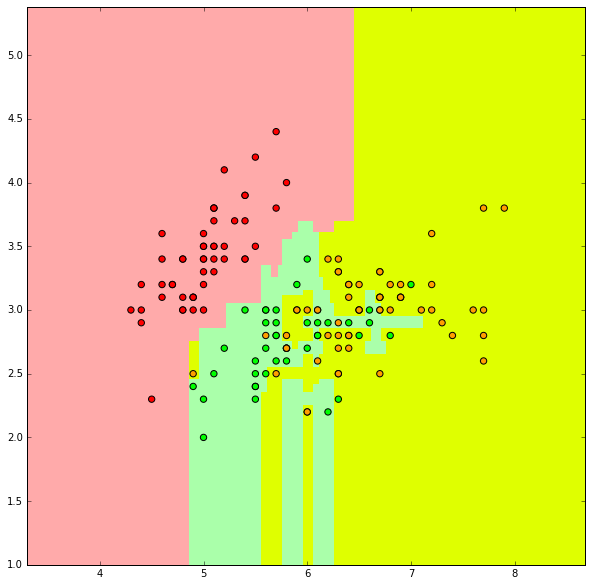

In [30]:
#plot decision boundaries

#x and y axis min and max
x_min, x_max = Xir_train[:, 0].min() - 1, Xir_train[:, 0].max() + 1
y_min, y_max = Xir_train[:, 1].min() - 1, Xir_train[:, 1].max() + 1

#select mesh step-size
h = 0.02
#prepare mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#concatenate along second axis to generate ndarray with point pairs
points = np.c_[xx.ravel(), yy.ravel()]

#predict for each point in the meshgrid
Z = rf.predict(points)
Z = Z.reshape(xx.shape)

#plot
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#DFFF00'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#FF9F00'])

plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(Xir[:, 0], Xir[:, 1], c=yir, cmap=cmap_bold, s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

In [56]:
#On the Cancer dataset, utilizing more features
Xc = cancer['data']
yc = cancer['target']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc)
rfc = RandomForestClassifier(n_estimators = 30, max_features = 8, random_state = 0, n_jobs = 4) 
#out of 30 features in total
#n_jobs sets the number of cores to be used in parallel during training
#random_state parameter setting allows results to be reproducible, as the seed value is known
rfc.fit(Xc_train, yc_train)
print rfc.score(Xc_train,yc_train)
print rfc.score(Xc_test,yc_test)

1.0
0.986013986014
